**LOGISIC REGRESSION**

Let's begin by importing necessary libaries

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

Let's load the data and take a look at the beautiful X matrix

In [15]:
df = pd.read_csv('masterfile done.csv')

X = df.iloc[:, 1:-2]
y = df['future result']
X

,team kpm,dragons,barons,towers,dpm,vspm,earned gpm,monsterkills_pm,cspm,goldat15
0,0.076987,0.028571,-0.090476,-0.695238,-134.718128,-0.185134,-27.306101,-0.968975,-1.398766,-872.666667
1,0.046773,0.000000,-0.200000,-1.266667,-157.622987,-0.214460,-59.177227,-1.279145,-1.704927,-851.666667
2,-0.003039,-0.025000,-0.295833,-2.016667,-211.525307,-0.393220,-94.854949,-1.253363,-1.796630,-1027.604167
3,-0.019650,0.000000,-1.000000,2.000000,705.006500,5.300050,93.700150,2.777322,3.850050,154.000000
4,0.479667,1.000000,1.000000,6.333333,187.260467,1.957733,441.377333,3.706456,3.117767,1349.333333
...,...,...,...,...,...,...,...,...,...,...
1451,0.004700,-1.500000,-0.500000,-2.500000,302.183200,-0.090650,-32.767300,0.195975,-1.532400,11.500000
1452,0.701100,5.500000,2.000000,14.500000,1698.845950,5.274850,900.492850,10.928177,9.999650,7614.500000
1453,-0.035333,-2.333333,-0.333333,-1.333333,-126.338950,-1.799233,-85.683450,-0.548742,-1.591583,273.833333
1454,-0.124610,-3.523810,-0.285714,-0.190476,-556.476652,-1.759019,-121.471481,-0.745499,-2.804424,-222.809524


Then, we need to divide the data into the training and test sets. Adittionaly I used the StandardScaler function to boost the performance of the regression.

The fit_transform and transform methods are used to make sure that there is no data leakage

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= y, random_state = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Now, I set up the cross-validation and hyper parameter tuning functions

In [17]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)
param_grid = {'C': np.arange(0.01, 2, 200),
            'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'solver': ['liblinear', 'lbfgs', 'saga'],
            'fit_intercept': [True, False]}

The rest is just fitting the model

In [18]:
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid=param_grid, cv=kf)
logreg_cv.fit(X_train_scaled, y_train)
score = logreg_cv.best_score_
print("Accuracy: ", score)
print("Best hyperparameters: ", logreg_cv.best_params_)

Accuracy:  0.676959917477159
Best hyperparameters:  {'C': np.float64(0.01), 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}


c:\Users\Jakub\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
140 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Jakub\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Jakub\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Jakub\AppD

Turns out that the model achives quite high accuracy of about 68% with the the best possible combination of hyperparameters. The errors above are just the result of testing every solver with every type of penalty. The lbfgs solver doesn't support l2 type of regularisation

Now let's test if by throwing out some predictor the model's performance can be increased

In [19]:
def powerset(s):
    """funcion that spits out every subset of a given set"""
    all_sets = []
    x = len(s)
    for i in range(1 << x):
        #print([s[j] for j in range(x) if (i & (1 << j))])
        subsets = [s[j] for j in range(x) if (i & (1 << j))]
        all_sets.append(subsets)
    return(all_sets)   

In [ ]:
sets = powerset([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
list = []
df = pd.read_csv('masterfile done.csv')
for i in range(1, (len(sets))):
    X = df.iloc[:, sets[i]]
    y = df['future result']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= y, random_state = 1)
    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    param_grid = {'C': np.arange(0.001, 2, 200),
            'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'solver': ['liblinear', 'lbfgs', 'saga'],
            'fit_intercept': [True, False]}
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    logreg = LogisticRegression()
    logreg_cv = GridSearchCV(logreg, param_grid=param_grid, cv=kf)
    logreg_cv.fit(X_train_scaled, y_train)
    score = logreg_cv.best_score_
    list.append([score, sets[i], logreg_cv.best_params_])
df_r = pd.DataFrame(list)
df_r.to_csv('Logistic Regression Full Test.csv')

I'm not going to include the the output from the cell above as it throws an avalanche of errors that stem from the fact that param_grid tries every possible combination of hyperparameters and some solvers are not compatible with the some type of penalties. However, the outputs are saved in the Logistic Regression Full Test file in the outputs folder

The logistic regression model achives the best accuracy for the following setup
0.6898025346301208
Predictors:
1. dragons
2. barons
3. towers
4. dpm
5. xpat15

Hyperparamiters:
1. penalty = l2 (ridge regularisation)
2. fit intercept = True
3. C = 0.001 (lambda parameter used for ridge regularisation)
4. solver = liblinear

With this setup the model achives the accuracy of 69% so there is a little improvement from the naked model but not much

Let's see how the model performs on a single data fold, bear in mind that the accuracy here is less reliable as it is no cross-validated

In [35]:
X = df.iloc[:, [2, 3, 4, 5, 11]]
y = df['future result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= y, random_state = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg = LogisticRegression(penalty= 'l2', fit_intercept= True, C=0.001, solver='liblinear', random_state=1)
logreg.fit(X_train_scaled, y_train)
acc_score = logreg.score(X_test_scaled, y_test)
acc_score

0.7226027397260274

Let's quickly take a look at the estimations of Beta paramiters for the model to see if they have correct directions

In [49]:
logreg.coef_

array([[0.0893442 , 0.09442648, 0.13938199, 0.11220427, 0.08110498]])

For this model the estimations are as follows:

1. dragons = 0.09
2. barons = 0.09
3. towers = 0.14
4. dpm = 0.11
5. xpat15 = 0.08

All the directions of the Beta parameters are correct
We can see that dragons, barons and xpat15 are very simmilar in strength, and the variables towers and dpm have grater impact as I hypothesised during the EDA when analysing the correlation matrix

The little improvement in accuracy doesn't matter that much, let's see what more ROC curve and confussion matrix can tell about the performance of this model

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

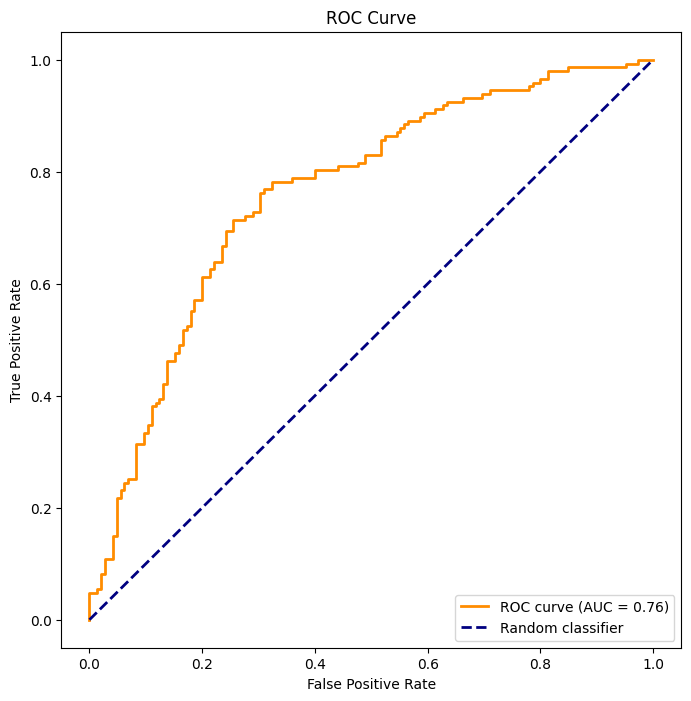

In [44]:
probabilities = logreg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

The ROC curve is far from ideal but I consider the AUC score of 0.76 to be a pretty good score. Of course the one lonely ROC curve doesn't tell us much (maybe except from the fact that built classifier is better than random classifier). It will prove usefull when I will compare various models

Now let's take a look at the confussion matrx

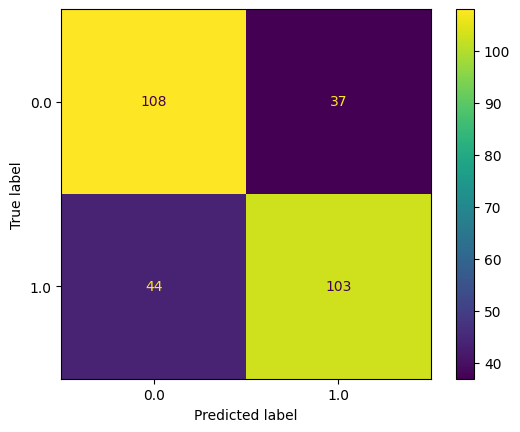

In [47]:
y_pred = logreg.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()

We can see that the majority of observatons was classified properly, there is no anomalous behaviour for any of the classes

**SUMMARY**

1. The logistic regression yelds pretty good results when modeling the outcome of future matches based on the past team performance
2. The teams that consistantly win their matches outperform their rivals in the folowing metrics
        
        1. dragons
        2. barons
        3. towers
        4. dpm
        5. xpat15
        
With additional emphasis on towers and dpm

3. The accuracy achived was 0.69%, I wish I could compare my model to the ones used by the bookies but sadly it's one of their most guarded trade secrets